In [1]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

import dask
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster

import sys 
import os
sys.path.append(os.path.abspath("D:/LDS6_ML/Final_term/myhelpers"))
from myhelpers import text_cleaner

import warnings
warnings.filterwarnings("ignore")

In [2]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\84935\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\84935\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\84935\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\84935\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\84935\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Read and EDA the data

In [3]:
data = pd.read_csv("Data/newsgroups.csv")
data.head()

,text,target,target_name
0,From: eder@hsvaic.boeing.com (Dani Eder)\nSubj...,3,sci.space
1,"From: MUNIZB%RWTMS2.decnet@rockwell.com (""RWTM...",3,sci.space
2,From: jfc@athena.mit.edu (John F Carr)\nSubjec...,2,rec.sport.baseball
3,From: gnb@leo.bby.com.au (Gregory N. Bond)\nSu...,3,sci.space
4,Organization: University of Illinois at Chicag...,4,talk.politics.guns


In [4]:
data.tail()

,text,target,target_name
4658,From: prb@access.digex.net (Pat)\nSubject: Shu...,3,sci.space
4659,From: mangoe@cs.umd.edu (Charley Wingate)\nSub...,0,alt.atheism
4660,From: car@trux.mi.org (Chris Rende)\nSubject: ...,1,comp.graphics
4661,From: loss@fs7.ECE.CMU.EDU (Doug Loss)\nSubjec...,3,sci.space
4662,From: thornley@micro.cs.umn.edu (David H. Thor...,2,rec.sport.baseball


### Take out the text to see the structure

In [5]:
print(data[data['target']==0]['text'].iloc[0])

From: GMILLS@CHEMICAL.watstar.uwaterloo.ca (Phil Trodwell)
Subject: Re: Amusing atheists and agnostics
Lines: 25
Organization: University of Waterloo

In article <timmbake.735175045@mcl> timmbake@mcl.ucsb.edu (Bake Timmons) writes:
>From: timmbake@mcl.ucsb.edu (Bake Timmons)
>Subject: Amusing atheists and agnostics
>Date: 18 Apr 93 23:17:25 GMT

[some big deletions]
>
>Many atheists show a poor understanding of human nature, so many 
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^                
>people who would otherwise sympathize with their cause only shake their 
>heads in disbelief at such childish ranting.

Another in a string of idiotic generalizations.  Gad, I'm surprised I got 
this far down in the post.  I guess some just like seeing their names up on 
a CRT.  

Like me :-)



Phil Trodwell 

***   This space   ***|   "I'd be happy to ram a goddam 440-volt cattle
***    for rent.   ***|   prod into that tub with you right now, but not
***     (cheap)    ***|   this

In [6]:
print(data[data['target']== 1]['text'].iloc[0])  

From: torb@mack.uit.no (Tor Berger)
Subject: 8th SCIA
Lines: 306
Organization: University of Tromsoe

               Invitation to the 8th SCIA

The 8th Scandinavian Conference on Image Analysis will be
arranged by the Norwegian Society for Image Processing and
Pattern Recognition (NOBIM) and sponsored by the International
Association for Pattern Recognition (IAPR). The conference
will be held in Tromsoe from 25th-28th May 1993. Tromsoe,
located at latitude 69 degrees N, is Northern Norway's centre
for administration and education.

About the Programme
The scientific programme runs over four days and includes
6 invited speakers, 29 sessions in three parallel tracks
with 127 contributed papers and 4 poster sessions with 44
contributions. The conference covers the following topics:
  - Image Processing and Analysis
  - Pattern Recognition
  - Computer Vision
  - Parallel Algorithms and Architectures
  - Neural Nets
  - Matching Methods
  - Image Compression
  - Remote Sensing
  - Medical

In [7]:
print(data[data['target']== 2]['text'].iloc[0])

From: jfc@athena.mit.edu (John F Carr)
Subject: Re: proposed catcher re-sub rule
Organization: Massachusetts Institute of Technology
Lines: 11
NNTP-Posting-Host: achates.mit.edu


The Red Sox usually have 2 catchers.  I don't think they have a backup now,
but they used to use Randy Kutcher as a backup catcher, as well as a middle
infielder and outfielder.  You don't need a good 3rd catcher, just a
competent one, so you can afford to lose a little catching ability and pick
a player who can be of use elsewhere on the field.



--
    John Carr (jfc@athena.mit.edu)



In [8]:
print(data[data['target']== 3]['text'].iloc[0])

From: eder@hsvaic.boeing.com (Dani Eder)
Subject: Re: Vandalizing the sky.
Organization: Boeing AI Center, Huntsville, AL
Lines: 18

Re: Space billboards

Even easier to implement than writing messages on the Moon, once upon
a time a group of space activists I belonged to in Seattle considered
a "Goodyear Blimp in orbit".  The idea was to use a large structure
that could carry an array of lights like the Goodyear Blimp has.
Placed in a low Earth orbit of high inclination, it could eventually
be seen by almost everyone on Earth.  Only our collective disapproval
of cluttering up space with such a thing stopped us from pursuing
it.  It had quite feasible economics, which I will not post here
because I don't want to encourage the idea (if you want to do such
a thing, go figure it out for yourself).

Dani Eder

-- 
Dani Eder/Meridian Investment Company/(205)464-2697(w)/232-7467(h)/
Rt.1, Box 188-2, Athens AL 35611/Location: 34deg 37' N 86deg 43' W +100m alt.



In [9]:
print(data[data['target']== 4]['text'].iloc[0])

Organization: University of Illinois at Chicago, academic Computer Center
From: Jason Kratz <U28037@uicvm.uic.edu>
Subject: Re: My Gun is like my American Express Card
Distribution: usa
 <93104.173826U28037@uicvm.uic.edu
 <1993Apr15.202811.29312@CSD-NewsHost.Stanford.EDU>
Lines: 28

In article <1993Apr15.202811.29312@CSD-NewsHost.Stanford.EDU>,
andy@SAIL.Stanford.EDU (Andy Freeman) says:
>
>>I have been at a shooting range where
>>gang members were "practicing" shooting.
>
>How do "we" know that they were gang members and not undercover cops
>or even law-abiding menacing minorities.  BTW - Why the sneer quotes?
>
"We" know because the area that the gun shop/shooting range is in is right on
the border of the west side of Chicago.  That is a gang infested area.  There
are many, many bad things going on in that area.  Also, I have several friends
that live very close to that area who have had problems with some of these
folks.  By the way, where did I say that they were minorities?  Do yo

#### Clean special characters

In [10]:
data['content'] = data['text'].replace(r'From(.*?)\n', ' ', regex=True)

data['content'] = data['text'].replace(r'Subject(.*?)\n', ' ', regex=True)

data['content'] = data['text'].replace(r'Line(.*?)\n', ' ', regex=True)

data['content'] = data['text'].replace(r'Date(.*?)\n', ' ', regex=True)

data['content'] = data['text'].replace(r'Organization(.*?)\n', ' ', regex=True)

data['content'] = data['text'].replace(r'(NNTP-Posting-Host|Nntp-Posting-Host)(.*?)\n', ' ', regex=True)

data['content'] = data['text'].replace(r'Distribution(.*?)\n', ' ', regex=True)

In [11]:
cluster = LocalCluster()
client = Client(cluster)
dask.config.set(scheduler='multiprocessing')

In [12]:
df_dask = dd.from_pandas(data, npartitions=16)
df_dask = df_dask.map_partitions(text_cleaner.simple_text_clean)

In [13]:
with ProgressBar():
    news_new = df_dask.compute(num_workers=8)
del df_dask

[########################################] | 100% Completed | 55.04 s


In [14]:
news_new.head()

,text,target,target_name,content
0,From: eder@hsvaic.boeing.com (Dani Eder)\nSubj...,3,sci.space,dani eder subject vandalize sky organization b...
1,"From: MUNIZB%RWTMS2.decnet@rockwell.com (""RWTM...",3,sci.space,munizb munizb subject space event near los ang...
2,From: jfc@athena.mit.edu (John F Carr)\nSubjec...,2,rec.sport.baseball,john f carr subject propose catcher sub rule o...
3,From: gnb@leo.bby.com.au (Gregory N. Bond)\nSu...,3,sci.space,gregory n bond subject give billion first year...
4,Organization: University of Illinois at Chicag...,4,talk.politics.guns,organization university illinois chicago acade...


In [15]:
target_dict = data[['target','target_name']].drop_duplicates().sort_values(by='target')
target_dict = target_dict.set_index('target').to_dict()
target_dict = target_dict['target_name']
target_dict

{0: 'alt.atheism',
 1: 'comp.graphics',
 2: 'rec.sport.baseball',
 3: 'sci.space',
 4: 'talk.politics.guns'}

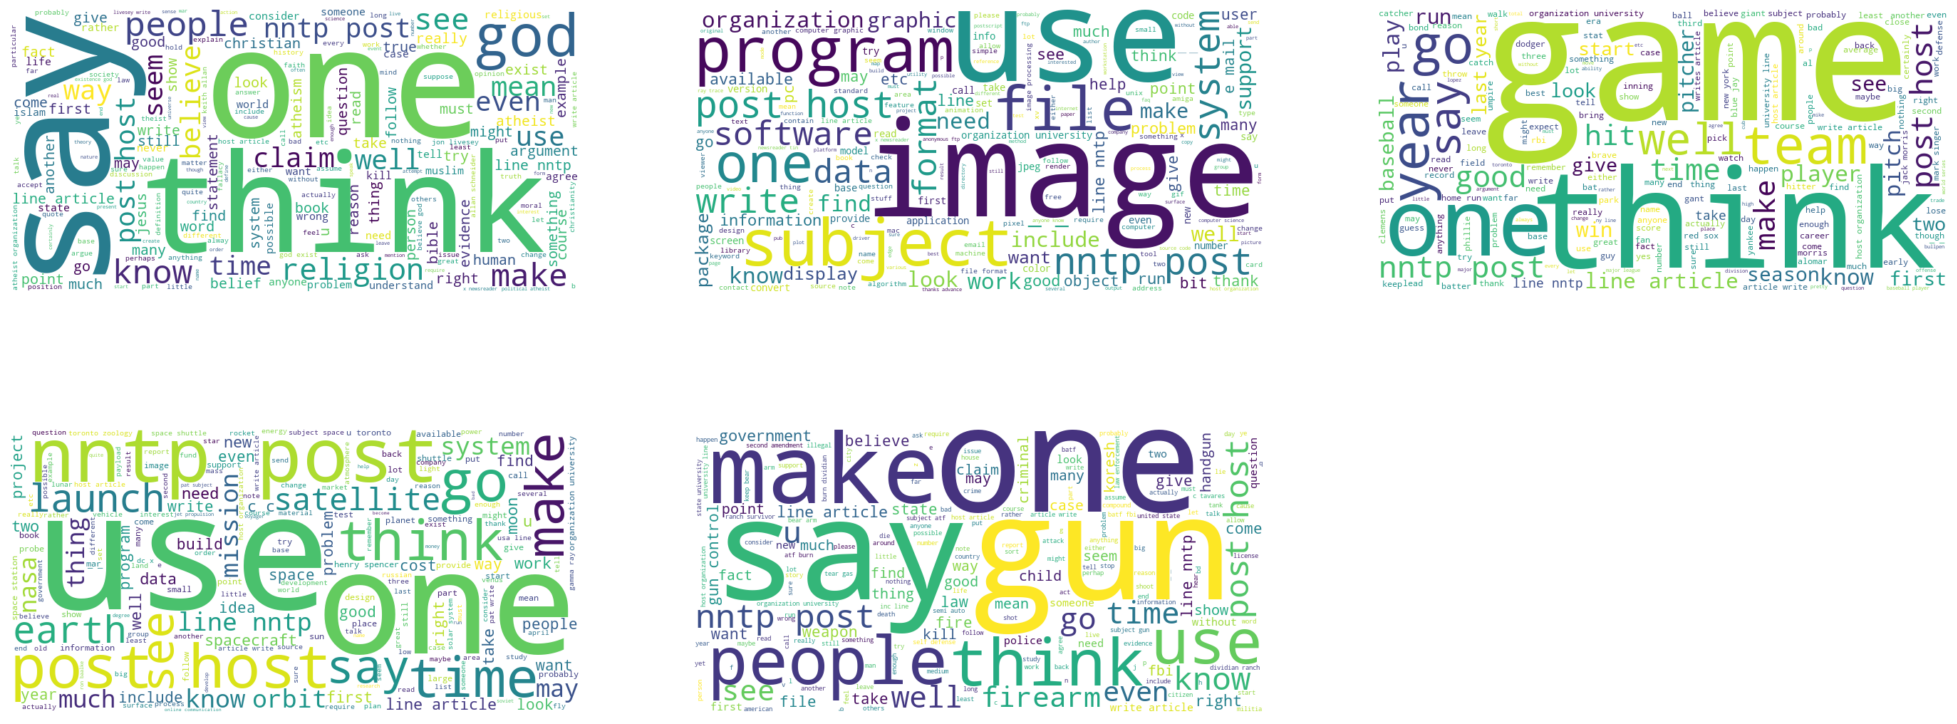

In [16]:
from wordcloud import WordCloud
plt.figure(figsize =(25, 10)) 
for i in range(0,5):
    texts = ' '.join(news_new.loc[news_new['target']==i, 'content'].values.tolist())
    wordcloud = WordCloud(background_color='white', width=800, height=400).generate(texts)  
    plt.subplot(230+i+1)                       
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
plt.show()

### Customize data and fit the model

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=0.02)

In [19]:
vectorizer.fit(news_new['text'])

TfidfVectorizer(min_df=0.02, ngram_range=(1, 2))

In [20]:
X = vectorizer.transform(news_new['text'])

In [21]:
model_data = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())

In [22]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [23]:
cluster = GaussianMixture(n_components=5)

In [24]:
labels = cluster.fit_predict(model_data)

#### Plot some clusters

In [27]:
model_data['cluster_'] = labels

In [28]:
cluster_0 = model_data[model_data['cluster_'] == 0].drop('cluster_', axis=1).sum().sort_values(ascending=False)
cluster_1 = model_data[model_data['cluster_'] == 1].drop('cluster_', axis=1).sum().sort_values(ascending=False)

In [29]:
wordcloud_0 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(cluster_0)
wordcloud_1 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(cluster_1)

(-0.5, 799.5, 399.5, -0.5)

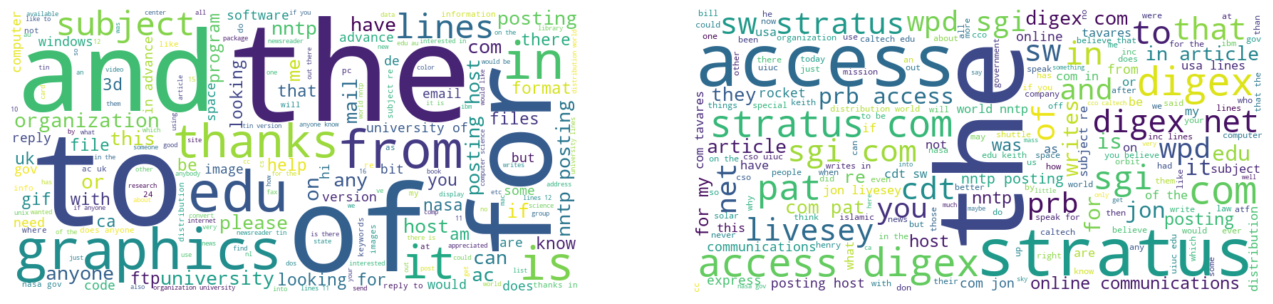

In [30]:
plt.figure(figsize=(25, 10))

plt.subplot(231)
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis('off')

plt.subplot(232)
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')

plt.show